In [17]:
import sys
!{sys.executable} -m pip install mysql-connector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mysql.connector
from datetime import datetime
import numpy as np
import dateutil.parser
mydb = mysql.connector.connect(
  host="iiwari-mariadb-server",
  user="root",
  passwd="d41k4Duu",
  database="iiwari_org"
)

In [19]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-10-01 00:00:00.000000+00:00' AND timestamp < '2019-10-31 00:00:00.000000+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 ");

df = pd.DataFrame(mycursor.fetchall())
df = df.drop(df[(df.x < 1000.0) & (df.y > 2000.0)].index)
df = df.drop(df[(df.x > 9000.0)].index)
x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table = pd.DataFrame(columns=list('NTXYZQ'))
table.N = df.node_id
table.T = df.timestamp
table.X = df.x
table.Y = df.y
table.Z = df.z
table.Q = df.q


table['T'] = table['T'].astype(str)
table['T'] = table['T'].str.slice(2, -15)

table['T'] = pd.to_datetime(table['T'], errors='coerce')
table['T'] = table['T'].dt.normalize()

#table1 = table[table['T'] != ts2]
print(table)

            N          T     X     Y  Z   Q
0       51719 2019-10-01   261  1173  0  64
1       51719 2019-10-01   242  1103  0  10
48      51719        NaT  1299  2764  0  56
49      51719 2019-10-01  1386  2736  0  64
50      51719 2019-10-01  1472  2738  0  66
...       ...        ...   ...   ... ..  ..
688205  51719 2019-10-30    46  1307  0  47
688206  51719 2019-10-30     3  1291  0  46
688456  51719 2019-10-30   256  1152  0  94
688460  51719 2019-10-30   241  1099  0  97
688464  51719 2019-10-30   246  1118  0  98

[51419 rows x 6 columns]


In [1]:
df2 = df.copy(deep=False)
a = 0
nopeudet = []
koordinaatit = []
q_arvot = []

for i in range (df.timestamp.size-1):
    ajan_erotus = np.datetime64(df.timestamp[i+1]) - np.datetime64(df.timestamp[i])
    ajan_erotus.item().total_seconds()
    ajan_erotus = ajan_erotus / np.timedelta64(1, 's')
    if ajan_erotus == 0.0:
        continue
    x_erotus = df.x[i+1]-df.x[i]
    y_erotus = df.y[i+1]-df.y[i]
    if (x_erotus / ajan_erotus > 1.5 and y_erotus / ajan_erotus > 1.5):
        #df2.drop(df.index[i], axis = 0, inplace=True)
        temp = []
        temp.append(df.x[i])
        temp.append(df.y[i])
        koordinaatit.append(temp)
        nopeus = math.sqrt((x_erotus / ajan_erotus)**2+(y_erotus / ajan_erotus)**2)
        nopeudet.append(nopeus)
        q_arvot.append(df.q[i])
        a += 1
        
ax = plt.plot(nopeudet)
plt.title("Poistettujen nopeuksien jakauma", fontsize = 16)
plt.show()

ax = plt.plot(q_arvot)
plt.title("Poistettujen nopeuksien q-arvojen jakauma", fontsize = 16)
plt.show()

print("poistettu liian nopean liikkeen takia "+str(a)+"/"+str(df.size)+" pistettä")

df = df.drop(df[(df.x < 1850.0) & (df.y > 3000.0)].index)

df_muokattu_koko = df.size

print("Poistettujen pisteiden lukumäärä: "+str(df_alkup_koko-df_muokattu_koko)+"/"+str(df_alkup_koko))

NameError: name 'df' is not defined

1 2019/10/01
2 2019/10/02
3 2019/10/03
4 2019/10/04
5 2019/10/05
6 2019/10/06
7 2019/10/07
8 2019/10/08
9 2019/10/09
10 2019/10/10
11 2019/10/11
12 2019/10/12
13 2019/10/13
14 2019/10/14
15 2019/10/15
16 2019/10/16
17 2019/10/17
18 2019/10/18
19 2019/10/19
20 2019/10/20
21 2019/10/21
22 2019/10/22
23 2019/10/23
24 2019/10/24
25 2019/10/25
26 2019/10/26
27 2019/10/27
28 2019/10/28
29 2019/10/29
30 2019/10/30
31 2019/10/31
['2019/10/01', '2019/10/02', '2019/10/03', '2019/10/04', '2019/10/05', '2019/10/06', '2019/10/07', '2019/10/08', '2019/10/09', '2019/10/10', '2019/10/11', '2019/10/12', '2019/10/13', '2019/10/14', '2019/10/15', '2019/10/16', '2019/10/17', '2019/10/18', '2019/10/19', '2019/10/20', '2019/10/21', '2019/10/22', '2019/10/23', '2019/10/24', '2019/10/25', '2019/10/26', '2019/10/27', '2019/10/28', '2019/10/29', '2019/10/30', '2019/10/31']


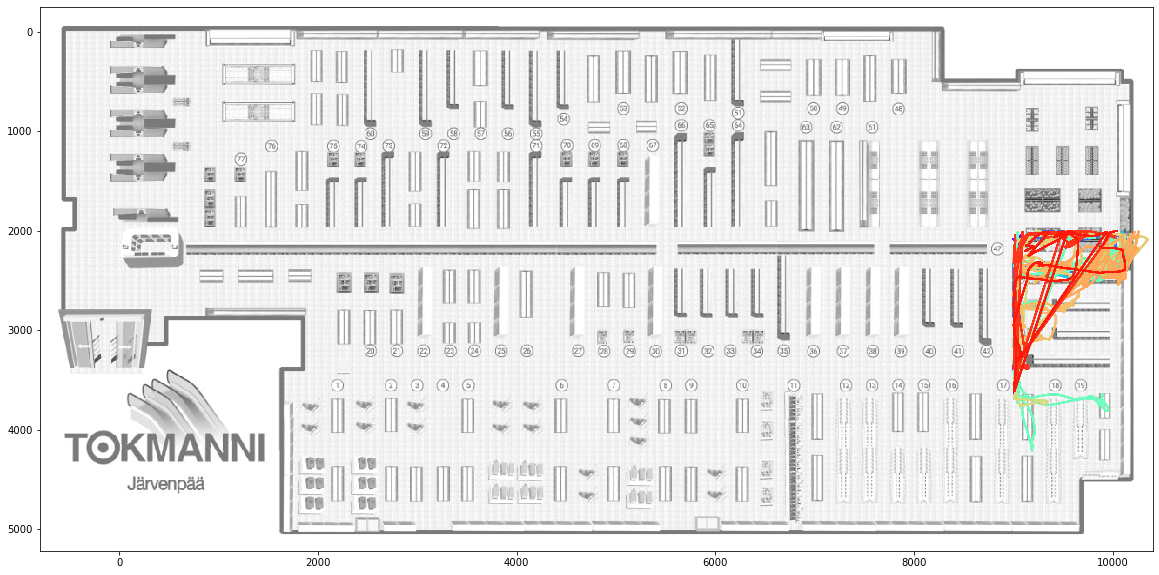

In [28]:
prev = 0
val = 0
def calc_velocity(time_start, time_end):
    #diff_time = time_start - time_end
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 0.1
x = 0
for i in range(len(data.x)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(data.x)):
        #print(i , " " , x, " ", len(df.x))
        value1 = calc_velocity(data.iloc[i-x, 1], data.iloc[i-(1+x), 1])
        value2 = int((abs(data.iloc[i-x, 2])) - prev)
        val =  value2 / value1
        if (val > 60 or value2 > 100):
            data.drop([data.index[i-x]], axis = 0, inplace = True)
            prev = abs(data.iloc[i-x, 2])
            x +=1
        else:
            prev = abs(data.iloc[i-x, 2])
x = 0
for i in range(len(data.y)):
   # print(abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3])))
    #print(abs(df.index[i+1]) - abs(df.index[i]))
    if(i < len(data.y)):
        value1 = calc_velocity(data.iloc[i-x, 1], data.iloc[i-(1+x), 1])
        value2 = int((abs(data.iloc[i-x, 3]))-prev)
        val = value2 / value1    
        if (val > 60 or value2 > 100):
            data.drop([data.index[i-x]], axis = 0, inplace = True)
            prev = abs(data.iloc[i-x , 3])
            x +=1
        else:
            prev = abs(data.iloc[i-x, 3])
    #print(prev)
    #if (abs(df.iloc[i+1, 3] - abs(df.iloc[i, 3]))) > 400:
        #print("We int")
        
print(len(data.x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  


In [ ]:
def calc_velocity1(time_start, time_end, ):
    #diff_time = time_start - time_end
    diff_time = np.datetime64(time_start) - np.datetime64(time_end)
    diff_time.item().total_seconds()
    diff_time = diff_time / np.timedelta64(1, 's')
    if(diff_time > 0.1):
        return diff_time
    else:
        return 0.1
x = 0
import math  
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  
devx1 = []
time = []
dist = []
speed = []
i = 1
for i in range(len(data.x)):
    time.append(calc_velocity1(data.iloc[i, 1], data.iloc[i-1, 1]))
    #val = int((abs(df.iloc[i, 2]) - prev)) / value1
    dist.append(calculateDistance(abs(data.iloc[i, 2]), abs(data.iloc[i, 3]),abs(data.iloc[i-1, 2]),  abs(data.iloc[i-1, 3])))
    #print(val)
speed = []
for i in range(len(dist)):
    speed.append((dist[i] / 93)/time[i])
x = 0
for i in speed:
    if(i > 2 or (dist[x]/93) > 100):
        data.drop([data.index[x]], axis = 0, inplace = True)
        x -= 1
    x += 1
print(len(data.x))

In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
tripEnd =[] 
tripStart = []
print(tripEnd)
started = False
ended = True
bol = False
for i in range(len(df)):
    #print(data.loc[data.index[i], 'x'],data.loc[data.index[i],'y'])
    if((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[data.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 0.0) & (df.loc[df.index[i],'y'] < 2199) &  started & (not ended)):
        tripEnd.append(i)
        #print(started)
        started = False
        ended = True
        #print("end")
    elif(((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[df.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 2200) & (df.loc[df.index[i],'y'] < 3100)) & (not started) & ended):
        #print(started)
        tripStart.append(i)
        started = True
        ended = False
        #print("start")
        
##j1 = 0
#for j in range(len(tripEnd)):
#    ax.plot(data.loc[tripStart[j]:tripEnd[j],'x'],data.loc[tripStart[j]:tripEnd[j],'y'] , linewidth=1, color=(rnd.randint(0,255),rnd.randint(0,255),rnd.randint(0,255)) )
#    j1 = j +1
#ax.imshow(img1, extent=[-800, 10400, 5400, -200])
#plt.show()
#print("HE")
print(tripEnd)
print(tripStart)

In [ ]:
from termcolor import colored
fig, ax = plt.subplots()
prev = 0
ax.imshow(img1, extent=[-800, 10400, 5400, -200])
#print(tripEnd)
x = 0
result = []
col = ['red','green','yellow','blue','magenta','cyan']
cols = []
print(df.dtypes)
print(len(tripEnd) -1)
length = len(tripEnd) -1
prevs = 0
for j in range(length):
    #print(j)
    index = tripStart[j-x]
    index2 = tripEnd[j-x]
    #print(data.iloc[index, 1] - data.iloc[index2, 1])
    res = calc_velocity(df.iloc[index2, 1], df.iloc[index, 1]) / 60
    if(res > 200):
        del tripEnd[j-x]
        del tripStart[j-x]
        x += 1
    else:
        result.append(res)
        colr = np.random.randint(0,6)
        if(colr == prevs):
            colr = np.random.randint(0,6)
        else:
            pass
        cols.append(colr)
        #col.append(colr)
        #print(col)
        print(colr)
        ax.plot(df.loc[tripStart[j]:tripEnd[j],'x'],df.loc[tripStart[j]:tripEnd[j],'y'] , linewidth=1, color=col[colr])
        prevs = colr
for i in range(len(result)):
    print(colored(result[i], col[cols[i]]))


def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg
print("Average time spent in store ", cal_average(result))
print("Slowest took ", max(result), " minutes")
print("Sonic took ", min(result), " minutes")

In [11]:
from datetime import date, timedelta
d = 0
dates = []

start_date = date(2019, 10, 1)
end_date = date(2019, 10, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    ts = start_date.strftime("%Y/%m/%d")
    start_date += delta
    d += 1
    dates.append(ts)
    print(d, ts)
print(dates)
'''
ts1 = pd.to_datetime('24/9/2019', errors='coerce')
ts2 = pd.to_datetime('25/9/2019', errors='coerce')
ts3 = pd.to_datetime('26/9/2019', errors='coerce')
ts4 = pd.to_datetime('27/9/2019', errors='coerce')
ts5 = pd.to_datetime('28/9/2019', errors='coerce')
ts6 = pd.to_datetime('29/9/2019', errors='coerce')
ts7 = pd.to_datetime('30/9/2019', errors='coerce')
table1 = table.loc[table['T'] == ts1, :]
table2 = table.loc[table['T'] == ts2, :]
table3 = table.loc[table['T'] == ts3, :]
table4 = table.loc[table['T'] == ts4, :]
table5 = table.loc[table['T'] == ts5, :]
table6 = table.loc[table['T'] == ts6, :]
table7 = table.loc[table['T'] == ts7, :]
table5
'''

1 2019/10/01
2 2019/10/02
3 2019/10/03
4 2019/10/04
5 2019/10/05
6 2019/10/06
7 2019/10/07
8 2019/10/08
9 2019/10/09
10 2019/10/10
11 2019/10/11
12 2019/10/12
13 2019/10/13
14 2019/10/14
15 2019/10/15
16 2019/10/16
17 2019/10/17
18 2019/10/18
19 2019/10/19
20 2019/10/20
21 2019/10/21
22 2019/10/22
23 2019/10/23
24 2019/10/24
25 2019/10/25
26 2019/10/26
27 2019/10/27
28 2019/10/28
29 2019/10/29
30 2019/10/30
31 2019/10/31
['2019/10/01', '2019/10/02', '2019/10/03', '2019/10/04', '2019/10/05', '2019/10/06', '2019/10/07', '2019/10/08', '2019/10/09', '2019/10/10', '2019/10/11', '2019/10/12', '2019/10/13', '2019/10/14', '2019/10/15', '2019/10/16', '2019/10/17', '2019/10/18', '2019/10/19', '2019/10/20', '2019/10/21', '2019/10/22', '2019/10/23', '2019/10/24', '2019/10/25', '2019/10/26', '2019/10/27', '2019/10/28', '2019/10/29', '2019/10/30', '2019/10/31']


"\nts1 = pd.to_datetime('24/9/2019', errors='coerce')\nts2 = pd.to_datetime('25/9/2019', errors='coerce')\nts3 = pd.to_datetime('26/9/2019', errors='coerce')\nts4 = pd.to_datetime('27/9/2019', errors='coerce')\nts5 = pd.to_datetime('28/9/2019', errors='coerce')\nts6 = pd.to_datetime('29/9/2019', errors='coerce')\nts7 = pd.to_datetime('30/9/2019', errors='coerce')\ntable1 = table.loc[table['T'] == ts1, :]\ntable2 = table.loc[table['T'] == ts2, :]\ntable3 = table.loc[table['T'] == ts3, :]\ntable4 = table.loc[table['T'] == ts4, :]\ntable5 = table.loc[table['T'] == ts5, :]\ntable6 = table.loc[table['T'] == ts6, :]\ntable7 = table.loc[table['T'] == ts7, :]\ntable5\n"

In [ ]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, COUNT(node_id) FROM SensorData   WHERE timestamp > '2019-05-24 13:05:08.078133+00:00' AND timestamp < '2019-05-29 13:05:08.078133+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND   q <100 AND z = 0 GROUP BY node_id ");
nodes = pd.DataFrame(mycursor.fetchall())
nodes

nodes = nodes.rename(columns={'COUNT(node_id)': 'amount'})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = nodes.node_id
sizes = nodes.amount
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


objects = nodes.node_id
y_pos = np.arange(len(objects))
performance = nodes.amount

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Määrä')
plt.title('Kärrien käyttömäärä')

plt.show()

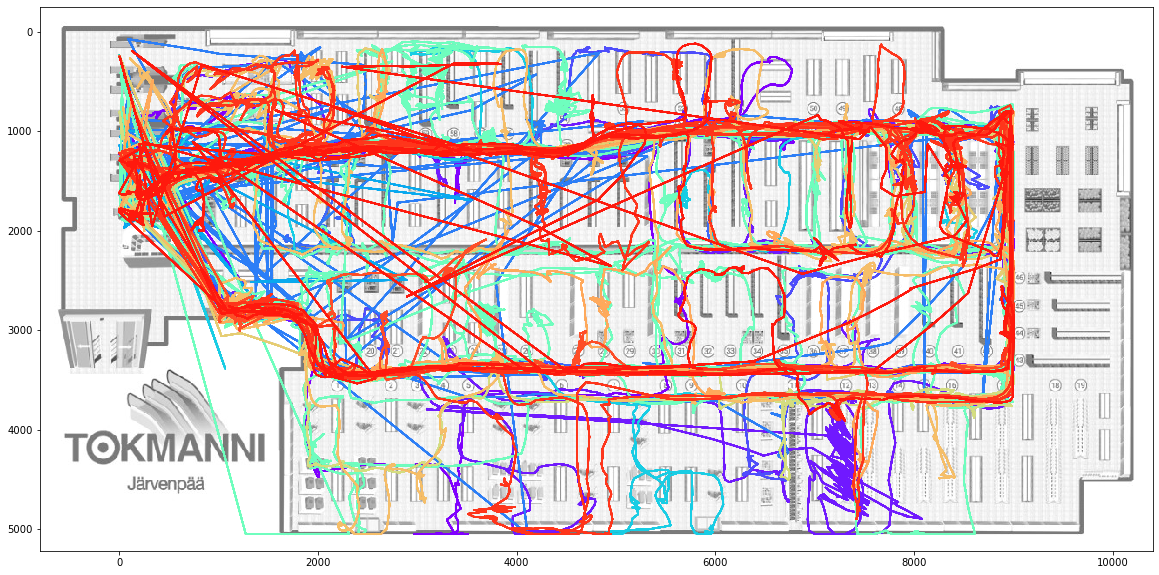

"\nax.plot(table1.X, table1.Y, marker='o', linewidth=0.2, markersize=3, color='r')\nax.plot(table2.X, table2.Y , marker='', linewidth=1, markersize=3, color='y')\nax.plot(table3.X, table3.Y , marker='', linewidth=1, markersize=3, color='b')\nax.plot(table4.X, table4.Y , marker='', linewidth=1, markersize=3, color='darkorange')\nax.plot(table5.X, table5.Y , marker='', linewidth=1, markersize=3, color='g')\nax.plot(table6.X, table6.Y , marker='', linewidth=1, markersize=3, color='c')\nax.plot(table7.X, table7.Y , marker='', linewidth=1, markersize=3, color='peru')\n"

In [29]:
from matplotlib.pyplot import cm
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


n = len(dates)
colors=iter(cm.rainbow(np.linspace(0,1,n)))

plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
#imgplot = plt.imshow(img, extent = (-700, 10406, 5224, -250))
ax.imshow(img, extent=[-800, 10400, 5220, -250])

#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'c', 'm','lime', 'b', 'darkorange', 'g'])))
for i in dates:
    tsT = table.loc[table['T'] == i, :]
    c=next(colors)
    for i in range(n):
        plt.plot(tsT.X, tsT.Y, color=c)
plt.show()

'''
ax.plot(table1.X, table1.Y, marker='o', linewidth=0.2, markersize=3, color='r')
ax.plot(table2.X, table2.Y , marker='', linewidth=1, markersize=3, color='y')
ax.plot(table3.X, table3.Y , marker='', linewidth=1, markersize=3, color='b')
ax.plot(table4.X, table4.Y , marker='', linewidth=1, markersize=3, color='darkorange')
ax.plot(table5.X, table5.Y , marker='', linewidth=1, markersize=3, color='g')
ax.plot(table6.X, table6.Y , marker='', linewidth=1, markersize=3, color='c')
ax.plot(table7.X, table7.Y , marker='', linewidth=1, markersize=3, color='peru')
'''

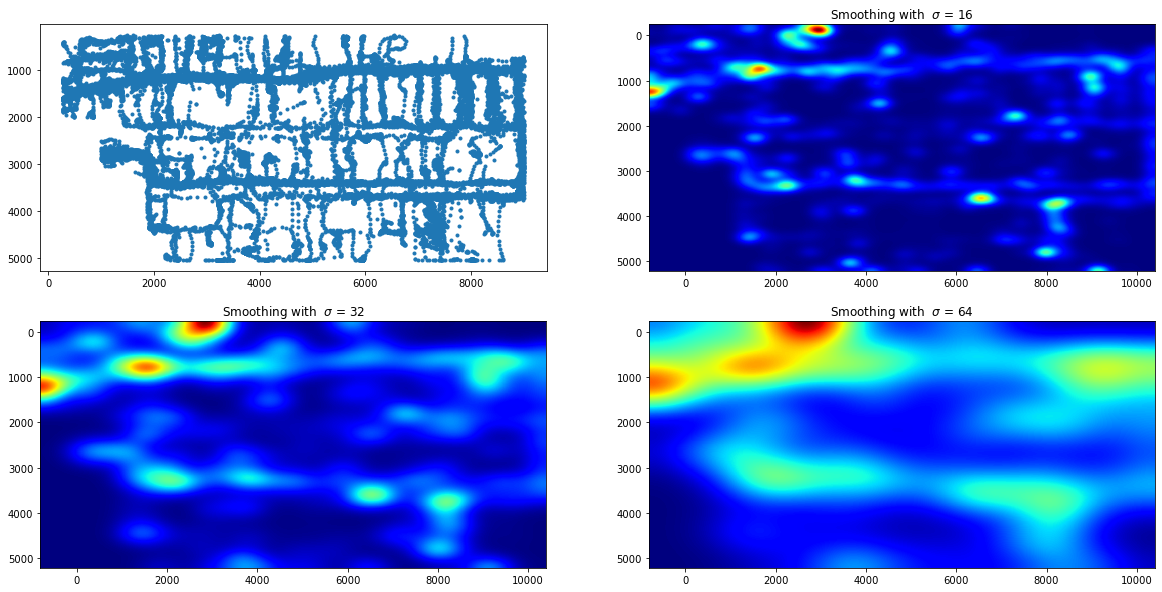

In [20]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm

x = df.x.tolist()
y = df.y.tolist()



def myplot(x, y, s, bins=1000):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return heatmap.T, extent

extent=[-800, 10400, 5220, -250]
img2 = img
fig, axs = plt.subplots(2, 2)

sigmas = [0, 16, 32, 64]
for ax, s in zip(axs.flatten(), sigmas):
    if s == 0:
        ax.invert_yaxis()
        ax.plot(x, y, 'o', linewidth=0.2, markersize=3)
    else:
        img2, extent = myplot(x, y, s)
        ax.imshow(np.flipud(img2), extent=extent, origin='lower', cmap=cm.jet)
        ax.set_title("Smoothing with  $\sigma$ = %d" % s)

plt.show()

In [114]:
#table2 = table.loc[table['T'] >= ts2, :]
'''
i = i.strftime("%d")
for i in table['T']:
    if i > ts:
        [row for row in table if row[1] != ts]
'''
#table.drop(ts, 0, inplace = True)
print(table)
table.dtypes

            N          T     X     Y  Z   Q
0       51719 2019-10-01   261  1173  0  64
1       51719 2019-10-01   242  1103  0  10
48      51719        NaT  1299  2764  0  56
49      51719 2019-10-01  1386  2736  0  64
50      51719 2019-10-01  1472  2738  0  66
...       ...        ...   ...   ... ..  ..
422361  51719 2019-10-14    94   570  0  98
422370  51719 2019-10-14   107   617  0  99
422371  51719        NaT   244  1108  0  94
422378  51719 2019-10-14   127   690  0  98
422381  51719 2019-10-14   139   730  0  97

[13993 rows x 6 columns]


N             int64
T    datetime64[ns]
X             int64
Y             int64
Z             int64
Q             int64
dtype: object

In [ ]:
tripEnd =[] 
print(tripEnd)
started = False
bol = False
for i in range(len(df)):
    #print(data.loc[data.index[i], 'x'],data.loc[data.index[i],'y'])
    if((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[df.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 0.0) & (df.loc[df.index[i],'y'] < 2199) &  started):
        tripEnd.append(i)
        #print(started)
        started = False
        #print("end")
    elif(((df.loc[df.index[i], 'x'] > -800.0) & (df.loc[df.index[i],'x'] < 700) & (df.loc[df.index[i],'y'] > 2200) & (df.loc[df.index[i],'y'] < 3100)) & (not started)):
        #print(started)
        started = True
        #print("start")
        
        
        
j1 = 0
for j in tripEnd:
    ax.plot(df.loc[j1:j,'x'],df.loc[j1:j,'y'] , linewidth=1, color=(rnd.randint(0,255),rnd.randint(0,255),rnd.randint(0,255)) )
    j1 = j +1

ax.imshow(img1, extent=[-800, 10400, 5400, -200])
plt.show()
print("HE")
print(tripEnd)
print(df.loc[df.index[1], 'x'])
fig, ax = plt.subplots()
prev = 0
ax.imshow(img1, extent=[-800, 10400, 5400, -200])
#print(tripEnd)
for j in tripEnd:
    #print(j)
    ax.plot(df.loc[prev:j,'x'],df.loc[prev:j,'y'] , linewidth=0.6, color=np.random.rand(3,) )
    prev = j 

In [ ]:
table1 = table.loc[table['T'] <= ts2, :]
#table1 = table[table['T'] != ts2]
print(table1)

In [ ]:
table2 = table.loc[table['T'] >= ts2, :]
print(table2)

In [ ]:
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-10-01 00:00:00.000000+00:00' AND timestamp < '2019-10-31 00:00:00.000000+00:00'  AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 ");

outlayers = pd.DataFrame(mycursor.fetchall())
outlayers = outlayers.drop(outlayers[(outlayers.x > 1000.0) & (outlayers.y < 2000.0)].index)
outlayers = outlayers.drop(outlayers[(outlayers.x < 9000)].index)

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
O_table = pd.DataFrame(columns=list('NTXYZQ'))
O_table.N = outlayers.node_id
O_table.T = outlayers.timestamp
O_table.X = outlayers.x
O_table.Y = outlayers.y
O_table.Z = outlayers.z
O_table.Q = outlayers.q


O_table['T'] = O_table['T'].astype(str)
O_table['T'] = O_table['T'].str.slice(2, -15)

O_table['T'] = pd.to_datetime(O_table['T'], errors='coerce')
O_table['T'] = O_table['T'].dt.normalize()

print(O_table)

from datetime import date, timedelta
d = 0
dates = []

start_date = date(2019, 10, 1)
end_date = date(2019, 10, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    ts = start_date.strftime("%Y/%m/%d")
    start_date += delta
    d += 1
    dates.append(ts)
    print(d, ts)
print(dates)

from matplotlib.pyplot import cm
from cycler import cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


n = len(dates)
colors=iter(cm.rainbow(np.linspace(0,1,n)))

plt.rcParams['figure.figsize'] = 20, 10
img = plt.imread("pic.png")
fig, ax = plt.subplots()
#imgplot = plt.imshow(img, extent = (-700, 10406, 5224, -250))
ax.imshow(img, extent=[-800, 10400, 5220, -250])

#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'c', 'm','lime', 'b', 'darkorange', 'g'])))
for i in dates:
    tsT = O_table.loc[O_table['T'] == i, :]
    c=next(colors)
    for i in range(n):
        plt.plot(tsT.X, tsT.Y, color=c)
plt.show()






#df = df.drop(df[(df.x < 1000.0) & (df.y < 7000.0)].index)
#df.assign(x = df.x.mul(-1))
#df.assign(y = df.y.mul(-1))
#table['T'] = dateutil.parser.parse(table['T']).date()
mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-24 00:00:00.000000+00:00' AND timestamp < '2019-09-25 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times1 = pd.DataFrame(mycursor.fetchall())

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table1 = pd.DataFrame(columns=list('TXY'))
table1.T = times1.timestamp
table1.X = times1.x
table1.Y = times1.y
table1

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-25 00:00:00.000000+00:00' AND timestamp < '2019-09-26 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times2 = pd.DataFrame(mycursor.fetchall())
times2

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table2 = pd.DataFrame(columns=list('TXY'))
table2.T = times2.timestamp
table2.X = times2.x
table2.Y = times2.y
table2

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-26 00:00:00.000000+00:00' AND timestamp < '2019-09-27 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times3 = pd.DataFrame(mycursor.fetchall())
times3

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table3 = pd.DataFrame(columns=list('TXY'))
table3.T = times3.timestamp
table3.X = times3.x
table3.Y = times3.y
table3

mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData WHERE (node_id = 51719)  AND timestamp > '2019-09-27 00:00:00.000000+00:00' AND timestamp < '2019-09-28 00:00:00.000000+00:00' AND x > 0  AND X < 10406 AND y < 5220 AND y > 0 AND q < 100 AND z = 0 GROUP BY timestamp"); 
times4 = pd.DataFrame(mycursor.fetchall())
times4

x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
#milestone["only_date"] = [df.date() for df in milestone["datetime"]]
table4 = pd.DataFrame(columns=list('TXY'))
table4.T = times4.timestamp
table4.X = times4.x
table4.Y = times4.y
table4

table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].astype(str), table2['T'].astype(str), table3['T'].astype(str), table4['T'].astype(str)
table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].str.slice(2, -15), table2['T'].str.slice(2, -15), table3['T'].str.slice(2, -15), table4['T'].str.slice(2, -15)

#table['T'] = table['T'].astype('datetime64[ns]')
table1['T'], table2['T'], table3['T'], table4['T'] = pd.to_datetime(table1['T'], errors='coerce'), pd.to_datetime(table2['T'], errors='coerce'), pd.to_datetime(table3['T'], errors='coerce'), pd.to_datetime(table4['T'], errors='coerce')
table1['T'], table2['T'], table3['T'], table4['T'] = table1['T'].dt.normalize(), table2['T'].dt.normalize(), table3['T'].dt.normalize(), table4['T'].dt.normalize()
#table['T'] = pd.Series(table['T']).dt.round("S")
#table['T'] = table['T'].dt.date

times1 = times1.drop(times1[(times1.x < 1000.0) & (times1.y > 2000.0)].index)
times1 = times1.drop(times1[(times1.x > 9000.0)].index)

times2 = times2.drop(times2[(times2.x < 1000.0) & (times2.y > 2000.0)].index)
times2 = times2.drop(times2[(times2.x > 9000.0)].index)

times3 = times3.drop(times3[(times3.x < 1000.0) & (times3.y > 2000.0)].index)
times3 = times3.drop(times3[(times3.x > 9000.0)].index)

times4 = times4.drop(times4[(times4.x < 1000.0) & (times4.y > 2000.0)].index)
times4 = times4.drop(times4[(times4.x > 9000.0)].index)